In [1]:
%load_ext autoreload
%autoreload 2

import pens
import numpy as np

In [2]:
num_series = 1000
num_points = 100
SNR = 0.10  # Signal to Noise Ratio
x = np.linspace(0, 4 * np.pi, num_points)
# Generate unbiased Gaussian random walks
Y = np.cumsum(np.random.randn(num_series, num_points), axis=-1)

num_signal = int(round(SNR * num_series))
phi = (np.pi / 8) * np.random.randn(num_signal, 1)  # small random offset
Y[-num_signal:] = (
    np.sqrt(np.arange(num_points))[None, :]  # random walk RMS scaling factor
    * (np.sin(x[None, :] - phi)
       + 0.05 * np.random.randn(num_signal, num_points))  # small random noise
)

In [3]:
ens = pens.EnsembleTS(time=x, value=Y.T)

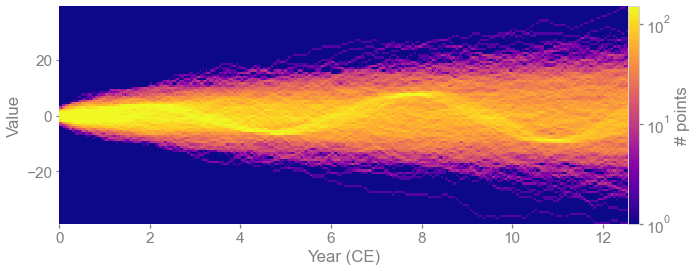

In [4]:
fig, ax = ens.plot_hist2d(
    bins=[400, 100], cmap='plasma', color_scale='log',
    vmax=150, num_fine=800,
)

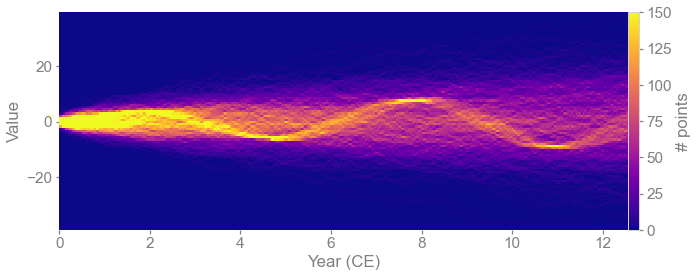

In [5]:
fig, ax = ens.plot_hist2d(
    bins=[400, 100], cmap='plasma', color_scale='linear',
    vmax=150, num_fine=800,
)

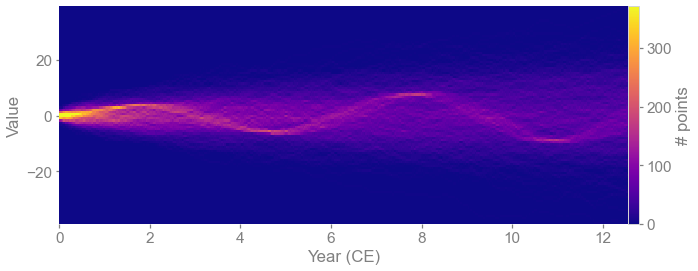

In [6]:
fig, ax = ens.plot_hist2d(
    bins=[400, 100], cmap='plasma', color_scale='linear',
)

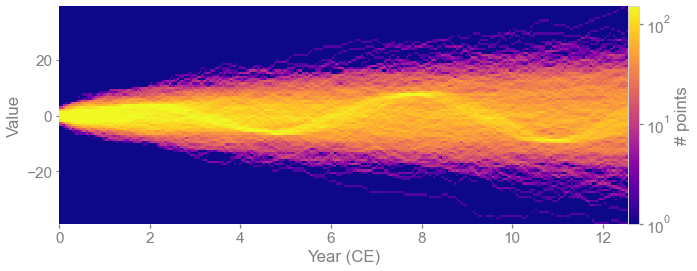

In [7]:
fig, ax = ens.plot_hist2d(color_scale='log', vmax=150, num_fine=ens.nt*6)